In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1) # 13 by 1행렬
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

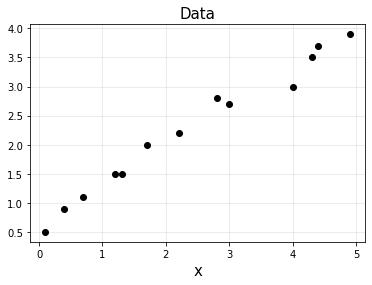

In [3]:
plt.plot(x,y,'ko')
plt.title('Data', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

In [4]:
A = np.hstack([x**0, x**1])
print(A)

[[1.  0.1]
 [1.  0.4]
 [1.  0.7]
 [1.  1.2]
 [1.  1.3]
 [1.  1.7]
 [1.  2.2]
 [1.  2.8]
 [1.  3. ]
 [1.  4. ]
 [1.  4.3]
 [1.  4.4]
 [1.  4.9]]


In [5]:
A = np.asmatrix(A)
theta = (A.T @ A).I @ A.T @ y

In [6]:
theta

matrix([[0.65306531],
        [0.67129519]])

In [7]:
xp = np.arange(0,5,0.01).reshape(-1,1)

In [8]:
#xp_ = np.hstack([xp**0, xp**1])
#yp = xp_ @ theta
yp = xp * theta[1,0] + theta[0,0]
yp.shape

(500, 1)

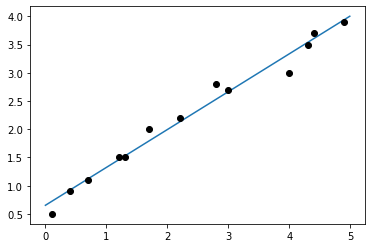

In [9]:
plt.plot(xp,yp)
plt.plot(x,y,'ko')

In [144]:
theta = np.random.rand(2, 1)
alpha = 0.001

for _ in range(1000) :
    df = 2 * (A.T @ A @ theta - A.T @ y) # (A * theta - y)제곱의 gradient
    theta = theta - alpha * df

print(theta)

[[0.65308366]
 [0.67128965]]


In [12]:
import cvxpy as cvx

In [13]:
theta2 = cvx.Variable([2, 1])

obj = cvx.Minimize(cvx.norm( A @ theta2 - y, 2)) # min(A * theta - y) norm2
const = []
prob = cvx.Problem(obj, const)
prob.solve()

theta2 = theta2.value

In [14]:
theta1 = cvx.Variable([2, 1])

obj = cvx.Minimize(cvx.norm( A @ theta1 - y, 1)) # min(A * theta - y) norm2
const = []
prob = cvx.Problem(obj, const)
prob.solve()

theta1 = theta1.value

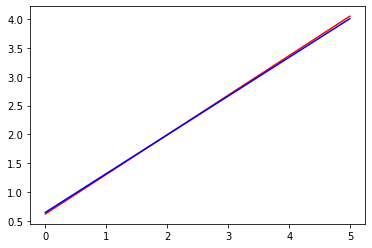

In [15]:
xp = np.arange(0,5,0.01).reshape(-1,1)
#yp1 = xp * theta1[1,0] + theta1[0,0]
#yp2 = xp * theta2[1,0] + theta2[0,0]
tmp = np.hstack([xp**0, xp**1])
yp1 = tmp @ theta1 
yp2 = tmp @ theta2

plt.plot(xp, yp1, 'r')
plt.plot(xp, yp2, 'b')

In [21]:
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

x = np.vstack([x, np.array([0.5, 3.8]).reshape(-1,1)])
y = np.vstack([y, np.array([3.9, 0.3]).reshape(-1,1)])

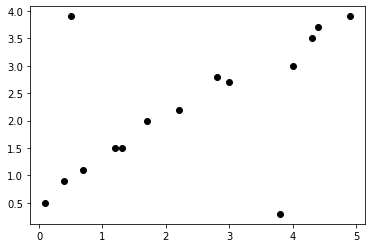

In [22]:
plt.plot(x,y, 'ko')

In [23]:
A = np.hstack([x**0, x**1])
A.shape

(15, 2)

In [57]:
#A = np.matrix(A)
#theta = (A.T @ A).I @ A.T @ y

theta = np.linalg.inv(A.T @ A) @ A.T @ y

theta

matrix([[1.25042815],
        [0.41766509]])

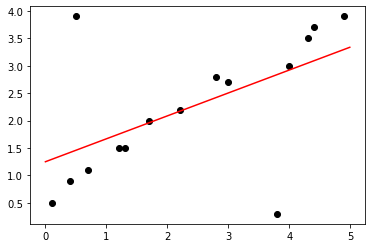

In [60]:
xp = np.arange(0,5,0.01).reshape(-1,1)
yp1 = theta[0,0] + xp * theta[1,0]

plt.plot(x,y,'ko')
plt.plot(xp,yp1,'r')

In [61]:
theta = cvx.Variable([2, 1])

obj = cvx.Minimize(cvx.norm( A @ theta - y , 1))
const = []
prob = cvx.Problem(obj, const)
prob.solve()
theta = theta.value

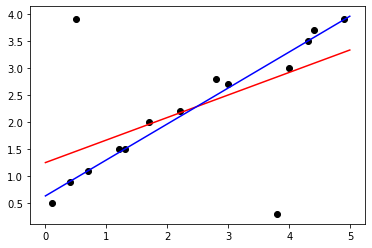

In [62]:
xp = np.arange(0,5,0.01).reshape(-1,1)
yp2 = theta[0,0] + xp * theta[1,0]

plt.plot(x,y,'ko')
plt.plot(xp,yp1,'r')
plt.plot(xp,yp2,'b')